# Introduction & Background

Cardiovascular diseases (CVD) are one of the most prominent causes of death, taking an estimated 17.9 million lives every year which is nearly 30% of all deaths worldwide. More than 4 out of 5 CVD deaths are caused by heart attacks and strokes, and one-third of these deaths are caused prematurely before the age of 70 (WHO, 2023).<br><Br>
Globally, it is estimated that 1 in 13 people live with a heart or circulatory disease, and according to The Lancet's Global Burden of Disease (GBD), as of 2019, coronary heart diseases have caused the most number of deaths (British Heart Foundation, 2023).

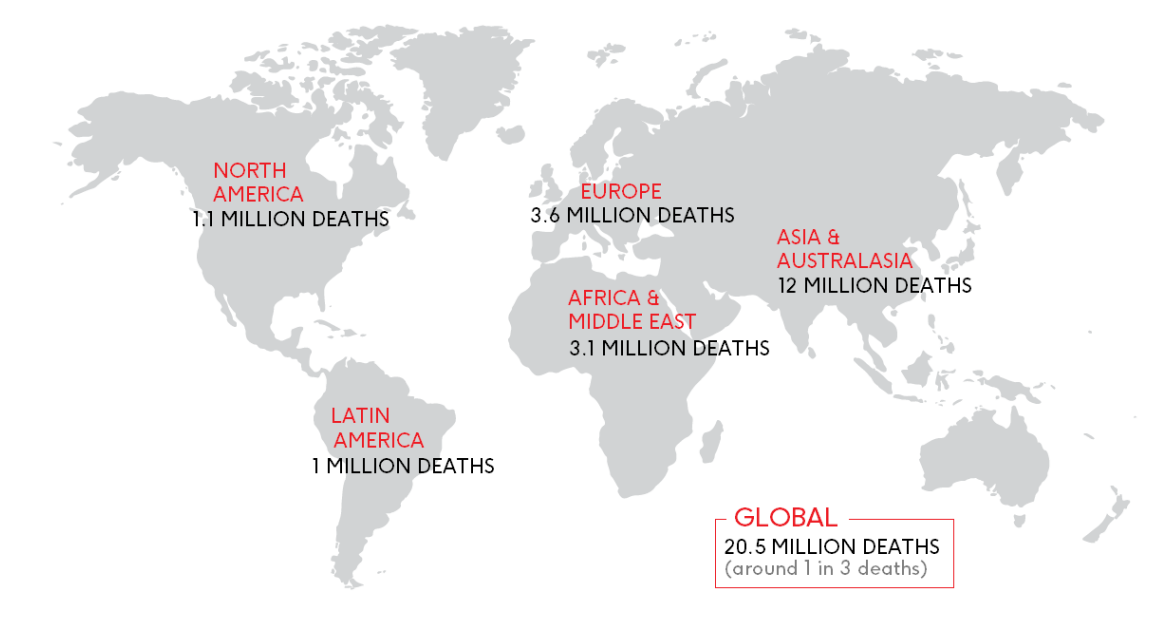

With current technologies like machine learning, it is possible to detect heart diseases early based on factors like age, sex, cholesterol levels, etc. Hence, our goal for this project is to be able to predict the probability of a patient being prone to heart disease based on various factors which will be discussed below. <br><Br>
The Heart Failure Prediction dataset from Kaggle provides a variety of factors that may potentially influence the probability of heart failure: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction (FEDESORIANO, 2021)

# Data Preperation

## <i> Importing Necessary Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid") # set the style of plots >> dark with grids

## <i> Importing the Dataset

In [2]:
#import dataset
heartData = pd.read_csv('heart.csv')
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heartData.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From the basic statistical description we can grasp on how the data may be distributed. Over here, we notice that some variables have 0 data points, which we will deal with later on.

## <i> Functions

* `missing` function produces a table that tells you the number of records that are missing, and the percentage of missing data points. 
* `basicEDAhistboxviolin` function plots histogram, boxplot, and violin plot for the numerical values in the given dataframe
* `basicEDAcatplot` function plots the category plot for categorical variables in the given dataframe
* `bivariateCategorical` plots a bivariate categorical plot for heart disease occurances and the categorical variables in the dataframe
* `bivariateNumerical` plots the boxplot for numerical variables based on the heart disease variable
* `bivariateNumericalHistogram` plots the histogram where the datapoints are differentiated by the heart disease column

In [4]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Number of records missing', 'Percentage of missing records'])
    return missing_values

# missing(heartData)

In [5]:
def basicEDAhistboxviolin(varNum, plotNum, dataframe):
    
    f, axes = plt.subplots(varNum, plotNum, figsize=(18, 24))

    count = 0
    for var in dataframe:
        if var != 'HeartDisease':
        
            sns.boxplot(data = dataframe[var], orient = "h", color="cyan", ax = axes[count,0])
            sns.histplot(data = dataframe[var], kde=True, color="pink", ax = axes[count,1])
            sns.violinplot(data = dataframe[var], orient = "h",color="gold", ax = axes[count,2])

            count += 1

# basicEDAhistboxviolin(5, 3, numericalHeartData)

In [6]:
def basicEDAcatplot(dataframe):
    
    
    for var in dataframe:
        if var!= 'HeartDisease':
            sns.catplot(y = var, data = dataframe, kind = "count", height=2, aspect=2)
        
# basicEDAcatplot(categoricalHeartData)

In [7]:
def bivariateCategorical(dataframe):
    index=1
    plt.figure(figsize=(14, 18)) 

    for var in dataframe:
         # Adjust the figure size as needed
        plt.subplot(3,2,index)
        index+= 1
        plt.xlabel('Heart Disease')
        plt.ylabel(var)
       
        sns.heatmap(heartData.groupby([dataframe[var], 'HeartDisease']).size().unstack(), 
        linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "rocket")

# bivariateCategorical(categoricalHeartData)

In [8]:
def bivariateNumerical(col, row, dataframe):
    index = 0
    plt.figure(figsize=(18,24))
    for var in dataframe:
        if var != "HeartDisease":
            index += 1
            plt.subplot(col, row, index)
            sns.boxplot(x=heartData['HeartDisease'], y=var, data=dataframe)

# bivariateNumerical(5,2,numericalHeartData)

In [9]:
def bivariateNumericalHistogram(col, row, dataFrame):
    plt.figure(figsize=(18,18))
    index = 0
    for var in dataFrame:
        if var != "HeartDisease":
            index += 1
            plt.subplot(col,row,index)
            plt.style.use('seaborn')
            plt.tight_layout()
            sns.set_context('talk')
            sns.histplot(data=dataFrame, x=var, hue="HeartDisease",multiple="stack",palette='rocket')
            
# bivariateNumericalHistogram(5, 2, numericalHeartData)    

In [10]:
def outlierRemove(dataframe, column):
    # Convert the column to numeric, coercing errors to NaN
    dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')

    # Calculate upper and lower whiskers
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5 * iqr
    lower_whisker = q1 - 1.5 * iqr

    # Replace outliers with np.nan
    #dataframe.loc[dataframe[column] > upper_whisker, column] = np.nan
    dataframe.loc[dataframe[column] < lower_whisker, column] = np.nan

# outlierRemove(heartData, "Cholesterol")

In [11]:
def replaceWithMean(var):
    meanWithDisease = heartData.loc[heartData['HeartDisease'] == 1, var].mean()
    meanWithoutDisease = heartData.loc[heartData['HeartDisease'] == 0, var].mean()
    
    print(meanWithDisease)
    print(meanWithoutDisease)
    
    heartData.loc[heartData['HeartDisease'] == 1, var] = heartData.loc[heartData['HeartDisease'] == 1, var].fillna(meanWithDisease)
    heartData.loc[heartData['HeartDisease'] == 0, var] = heartData.loc[heartData['HeartDisease'] == 0, var].fillna(meanWithoutDisease)
    
# replaceWithMean("Cholesterol")    

# Exploratory Data Analysis

## <i> Statistical Summary

In [12]:
print("There are", heartData.shape[0], "observations and", heartData.shape[1], "fields in the dataset")


There are 918 observations and 12 fields in the dataset


The response variable is `HeartDisease` and the rest seem to be predictors<br>
There are `6` categorical data out of which `HeartDisease` and `FastingBS` are numeric in nature<br>
There are `4` numeric variables<br>
There seems to be null values under the guise of 0 values

In [13]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Over here we see that there are no null values present in the dataset. However, in the beginning, we noticed that the minimum data values for some variables were 0. Let us double confirm this.

In [14]:
heartData.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


As you can see here, RestingBP and Cholesterol have a minimum value of 0. It is impossible for someone to have 0 cholesterol and Resting BP levels. Hence, this needs to be taken care of.

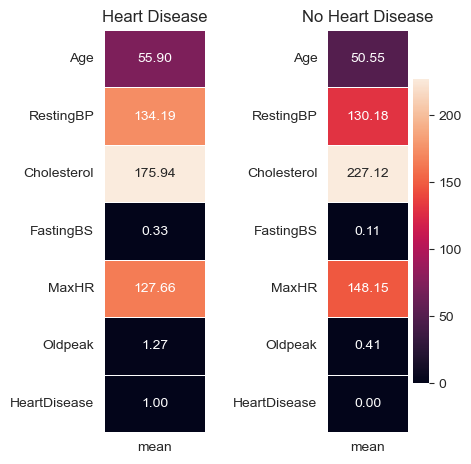

In [15]:
yes = heartData[heartData['HeartDisease'] == 1].describe().T
no = heartData[heartData['HeartDisease'] == 0].describe().T
colors = ['#f5428d','#a7effa']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = "rocket",linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = "rocket",linewidths = 0.4,linecolor = 'white',cbar = True,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

There are some discrepancies with facts and the mean of the data presented. For instance, the average cholesterol levels for a person with heart disease is seemingly lower than someone without heart disease. Factually, for people with heart disease, cholesterol levels are much higher than for people without heart disease (Cleveland Clinic, 2022). 

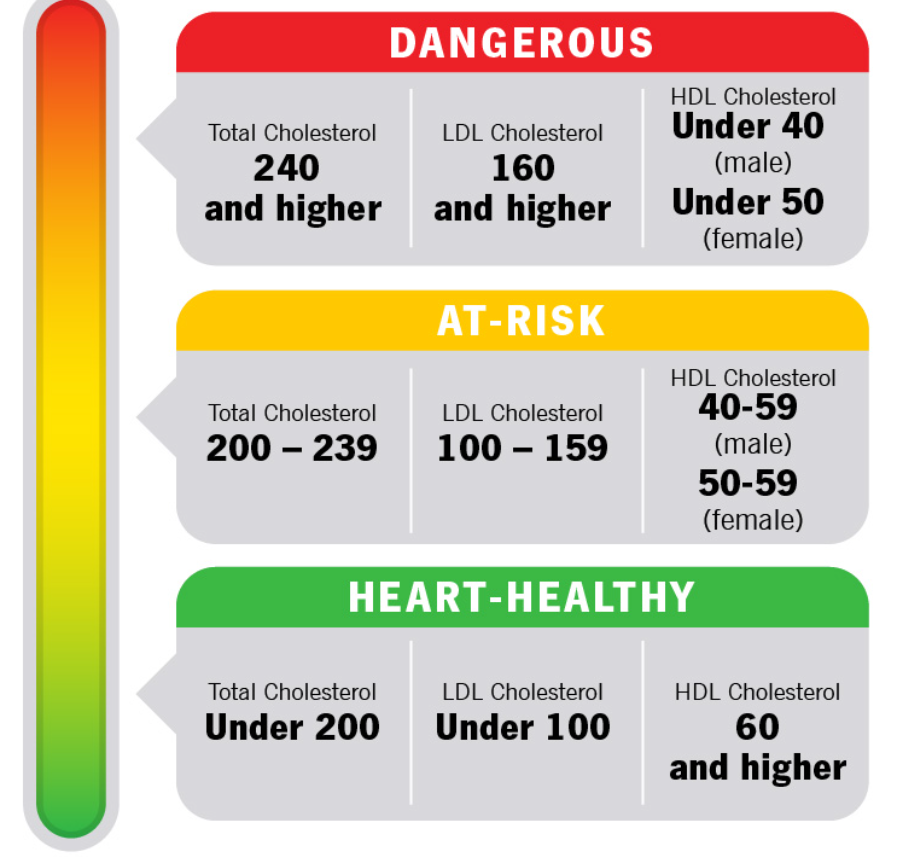

The best way to continue is to mend the data before feeding it to the model to avoid miscalculations and erraneous results.

## <i> Understanding the Predictor Variable

The predictor variable in our case is the `HeartDisease` column. This column indicates the records that have or do not have heart disease. It is important to check the distribution of heart disease to ensure that the dataset is not biased.

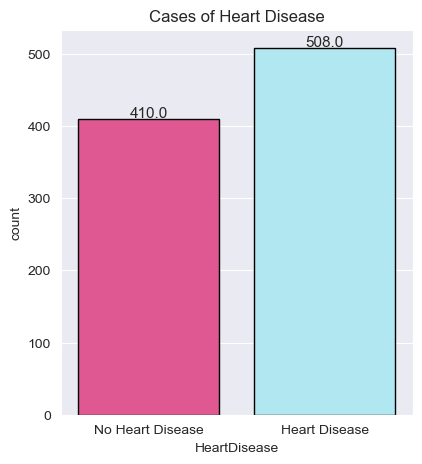

In [16]:
l = list(heartData['HeartDisease'].value_counts())


fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="HeartDisease",data=heartData, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

As you can see, the number of records with and without heart disease seems to be fairly balanced, hence there will be no need to upscale, or downsample the dataset.

## <i> Data Analysis

Seperating Dataset into numeric and categorical data 

In [17]:
numericalHeartData = pd.DataFrame(heartData[['Age', 'RestingBP', 'Cholesterol', 'Oldpeak', 'MaxHR', 'HeartDisease']])
categoricalHeartData = pd.DataFrame(heartData[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

# <i><b> Univariate Data Analysis

### Univariate Numerical Data Analysis

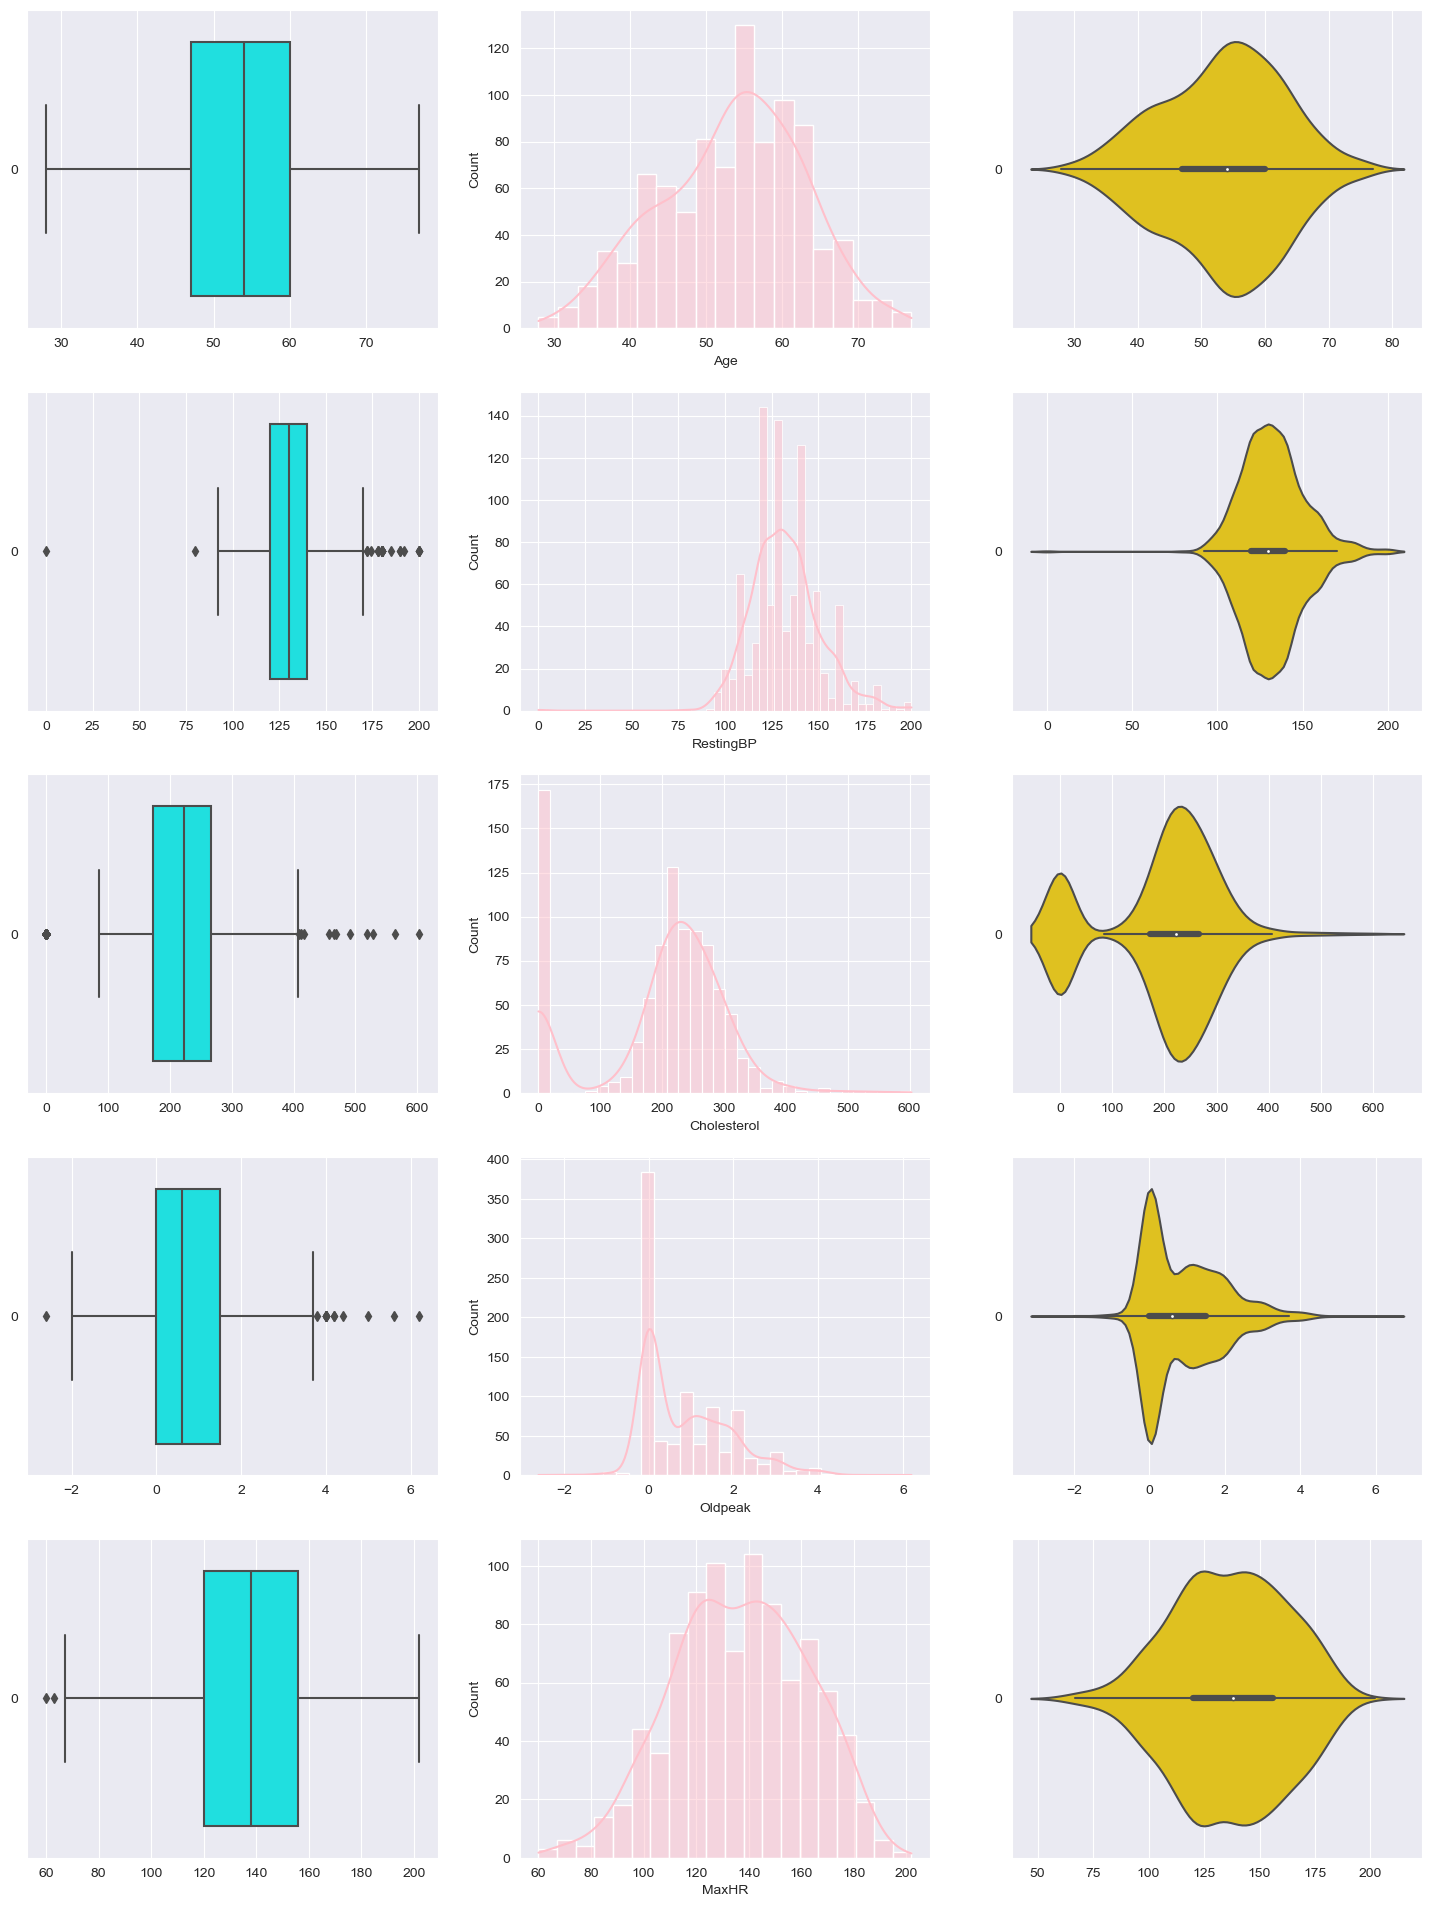

In [18]:
basicEDAhistboxviolin(5, 3, numericalHeartData)

<b>Age</b>: The distribution for age seems relatively fine, with a slight skew to the right, but nothing noticeably concerning. There are no outliers, and the minimum age is 28 and the highest is 77.<br><br>
<b>RestingBP</b>: The distribution for RestingBPis skewed well towards the right because of the outlier of 0 RestingBP. While there are outliers towards the third quartile, they seem to fit well into the KDE curve. The only concern would be the 0 value that is ruining the distribution.<br><br>
<b>Cholesterol</b>: The distribution for cholesterol is left skewed, and we can see a significant number of data points that have 0 value. It is impossible for a person to have 0 cholesterol, hence this should be treated as null values.<br><br>
<b>OldPeak</b>: It is important to note that the range for old peak goes from negative to postive, hence there is a need to scale it such that all the data points remain in the positive axis, so it is easier for modelling. The data is left skewed, and the 0 values should be of no concern. <br><br>
<b>MaHR</b>: There are a few outliers, none of which are concerning. The data is skewed slightly to the right, but should not pose an immense issue. <br><br>

> Areas of concern:
> * Remove outliers (0 values) for `Cholesterol` and `RestingBP` so that the distribution is better
> * Min Max Scale `OldPeak` so that the values range in the positive axis

### Univariate Categorical Data Analysis

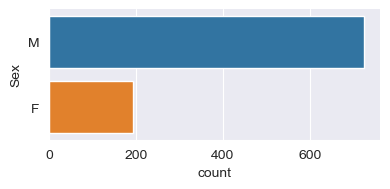

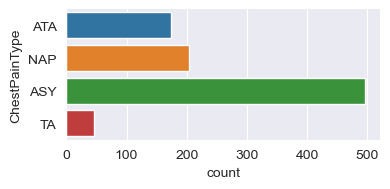

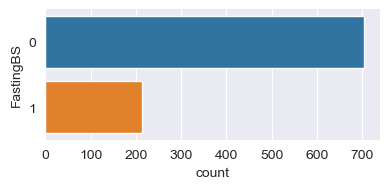

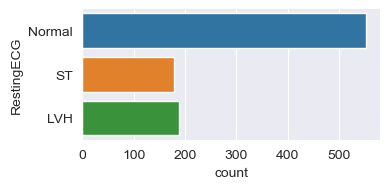

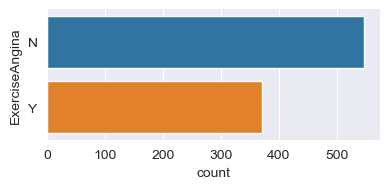

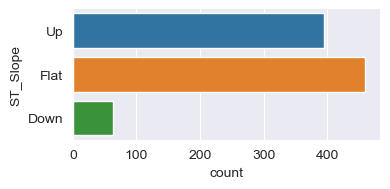

In [19]:
basicEDAcatplot(categoricalHeartData)

<b>Sex</b>: We can see that the ratio of male to female is uneven. There are more male datapoints than female. However, men are more likely to be susceptable to heart disease than women. <br><br>
<b>ChestPainType</b>: The most common type of chest pain is Asymptomatic, followed by Non-Anginal Pain and Atypical Angina, and the least common one is Typical Angina.<br><br>
<b>FastinBS</b>: The dataset has more patients with a Fasting blood sugar higher than 120.<br><br>
<b>RestingECG</b>: Most of the datapoints have normal Resting ECG. This may be concerning as it might not be a good indicator of heart disease.<br><br>
<b>ExceriseAngina</b>: There is almost an equal distribution of people with exercise induced angina and those without.<br><Br>
<b>ST_Slope</b>: The most common one is flat, followed by up, and the least common one is down.

>Areas of concern:
> * Understand if `RestingECG` is a good indicator of heart disease

# <i>Bi-variate Data Analysis

In this part we will take a look at the relationship between each variable and its relationship with heart disease.

### Numerical Analysis vs. Heart Disease

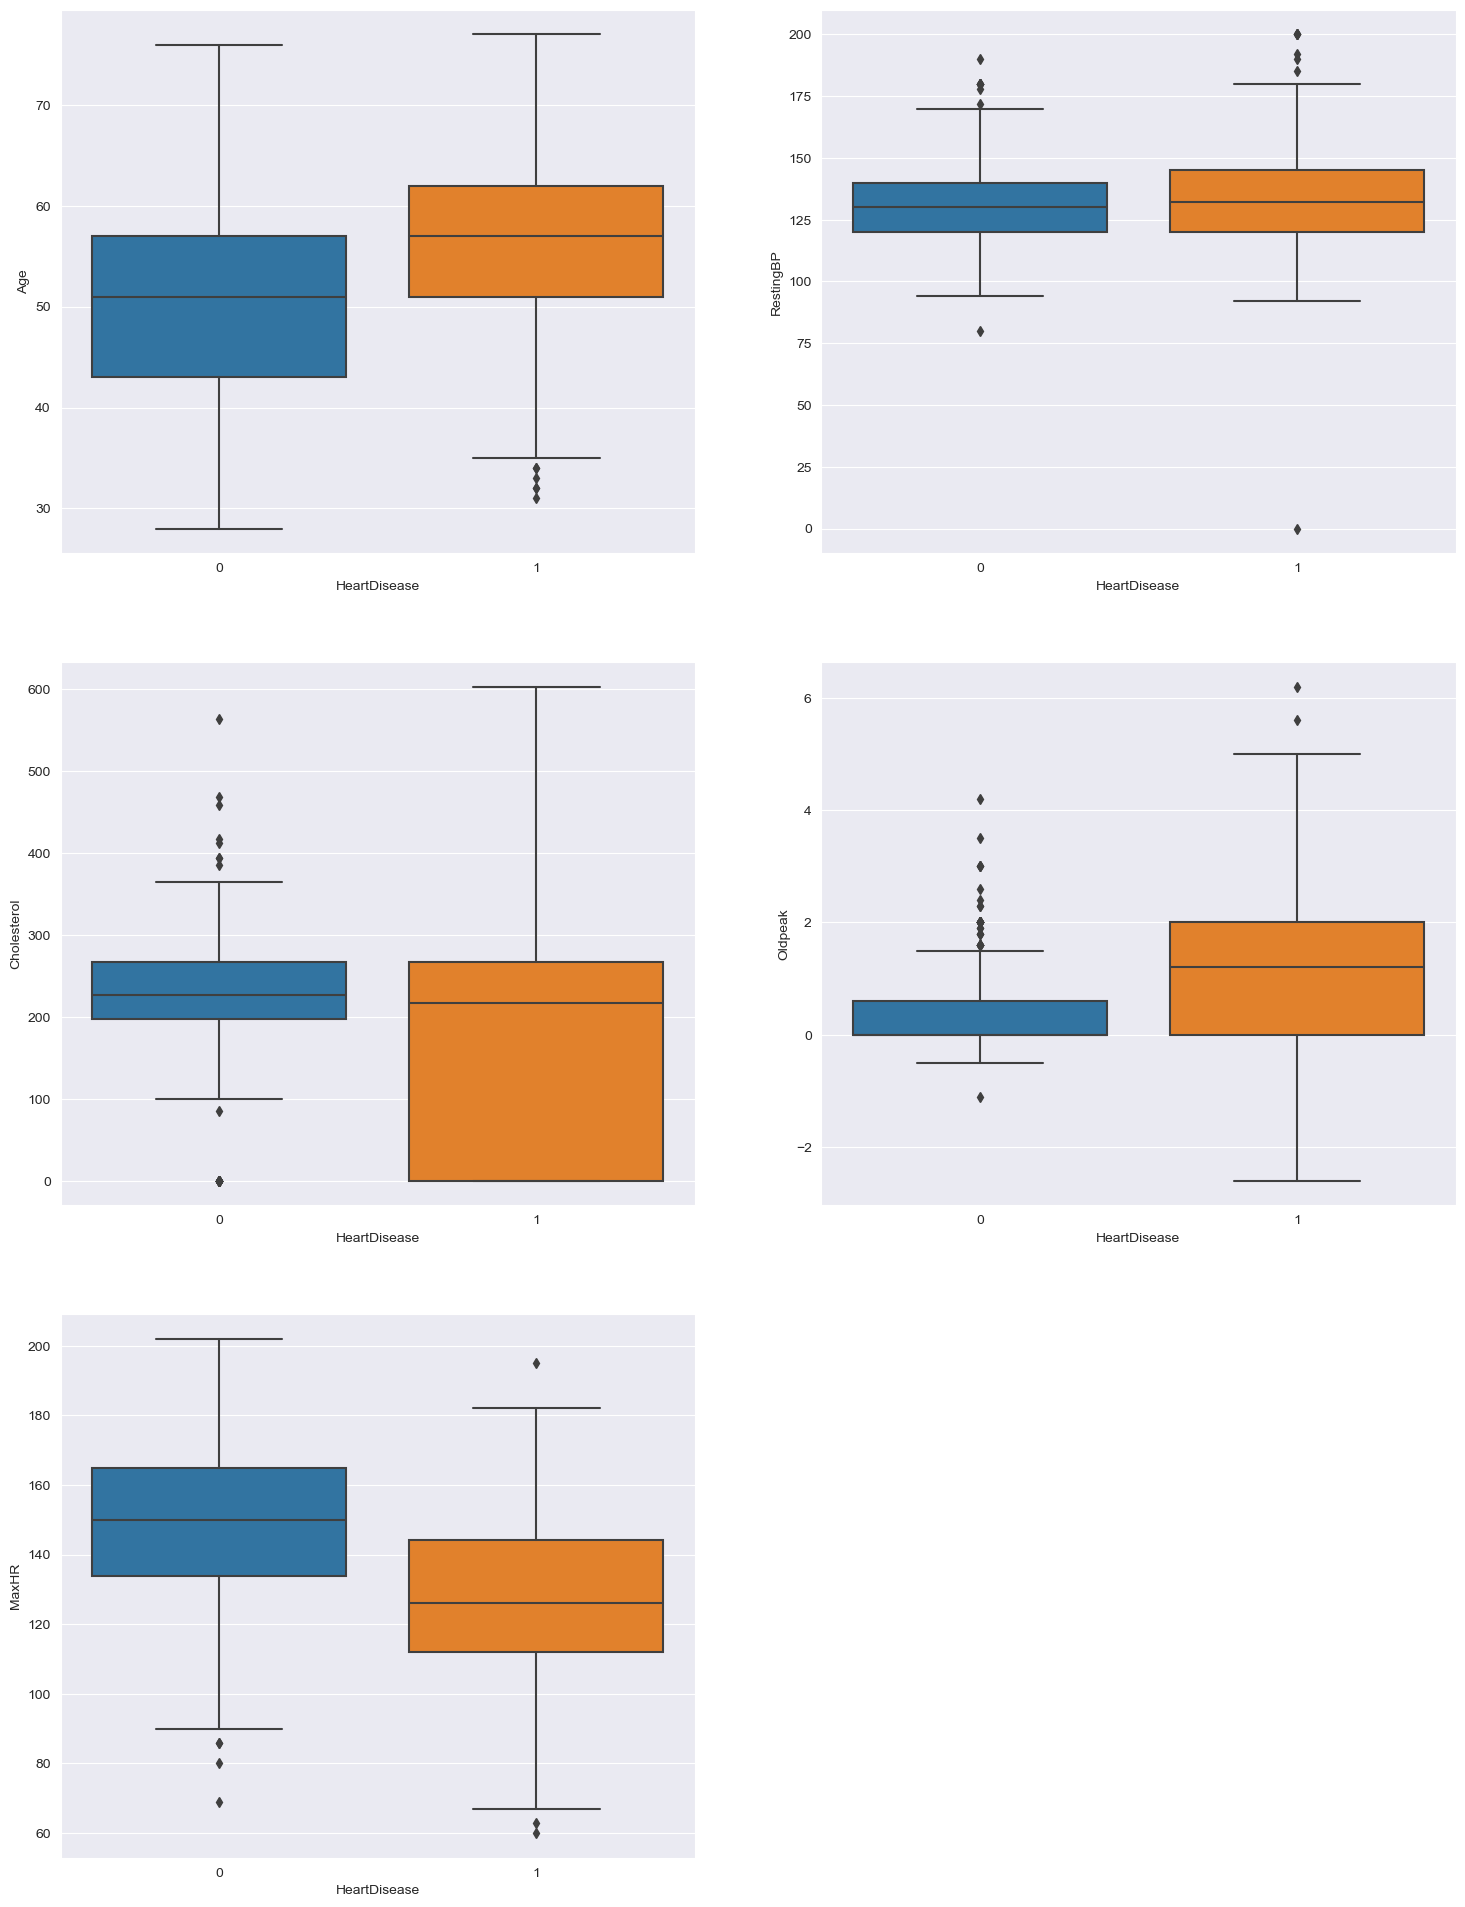

In [20]:
bivariateNumerical(3, 2, numericalHeartData)

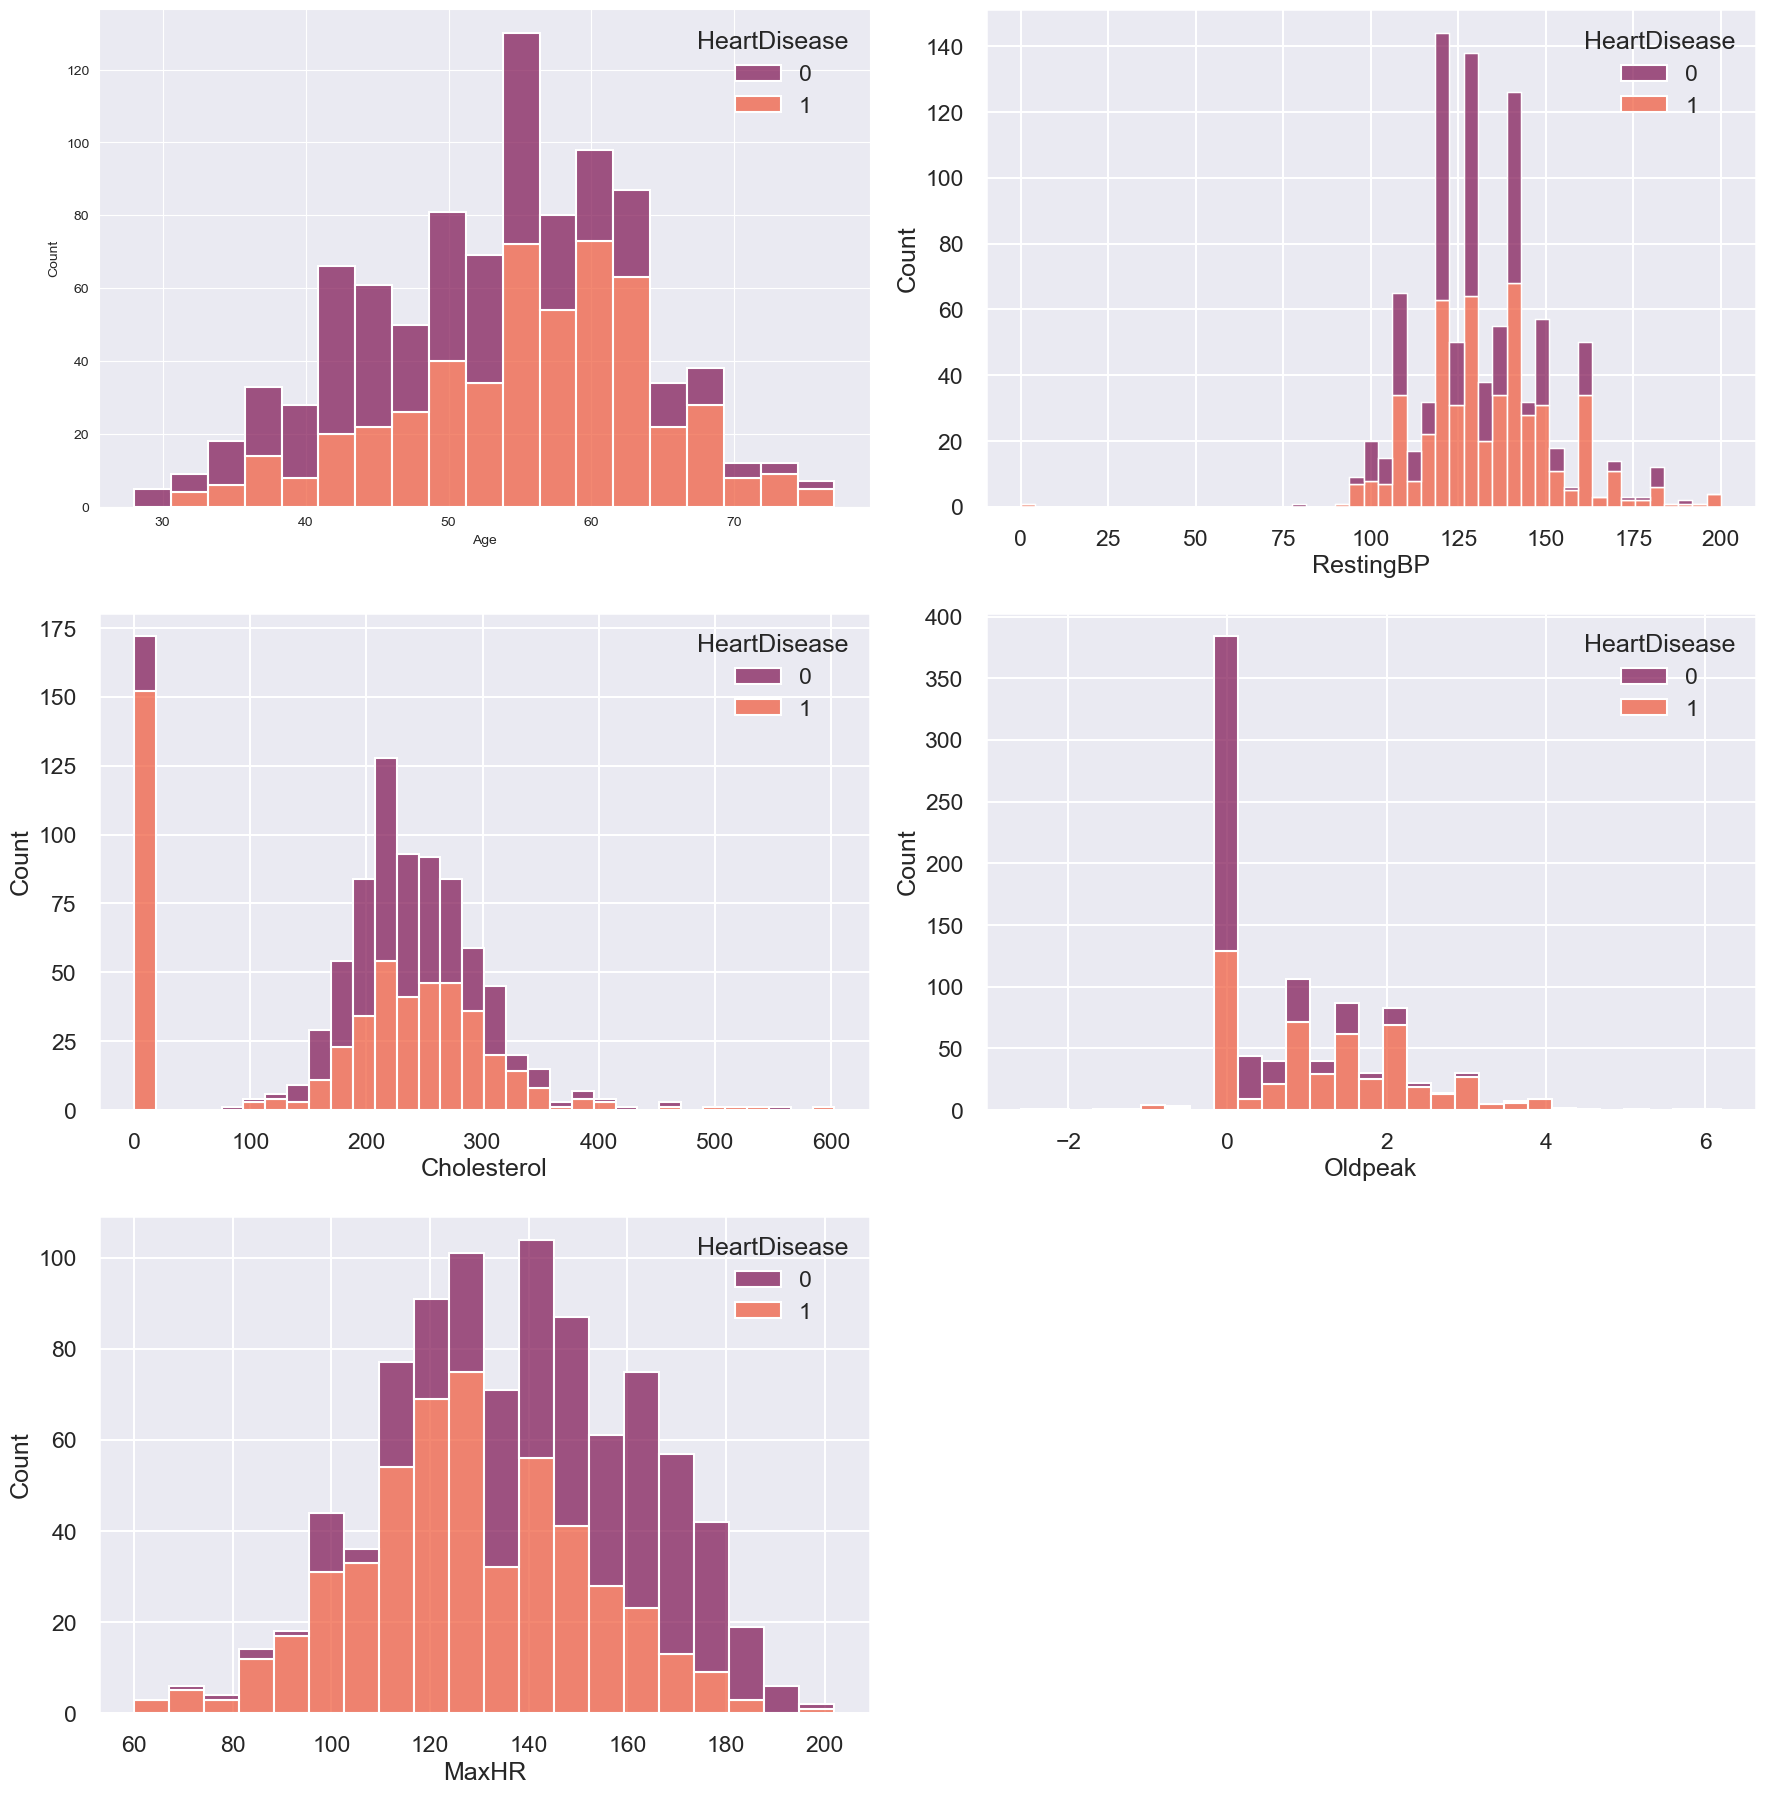

In [21]:
bivariateNumericalHistogram(3, 2, numericalHeartData)

<b>Age</b>: When you compare the plots for with and without heart disease, there is a clear distinction for the age groups for with adn without heart disease. You can see that the IQR and mean for people with heart disease fall higher than those without heart disease.<br><br>
<b>RestingBP</b>: When you compare the plots, you can see that there are no significant differences between the people with and without heart disease. This may pose an issue with the accuracy of the predicitons of the model and the variable could be potentially seen as not a helpful indicator.<br><br>
<b>Cholesterol</b>: As mentioend previosuly, the issue with high frequency of 0 values has cause for an inaccurate box plot. Hence there cannot be said much about the inaccurate box plot<br><br>
<b>OldPeak</b>: There is a visible difference on where the data points lie. The mean of people with heart disease is higher than those without. <br><br>
<b>MaHR</b>: There is a significant difference in the distribution of people with and without heart disease. <br><br>

### Categorical Analsysis vs. Heart Disease

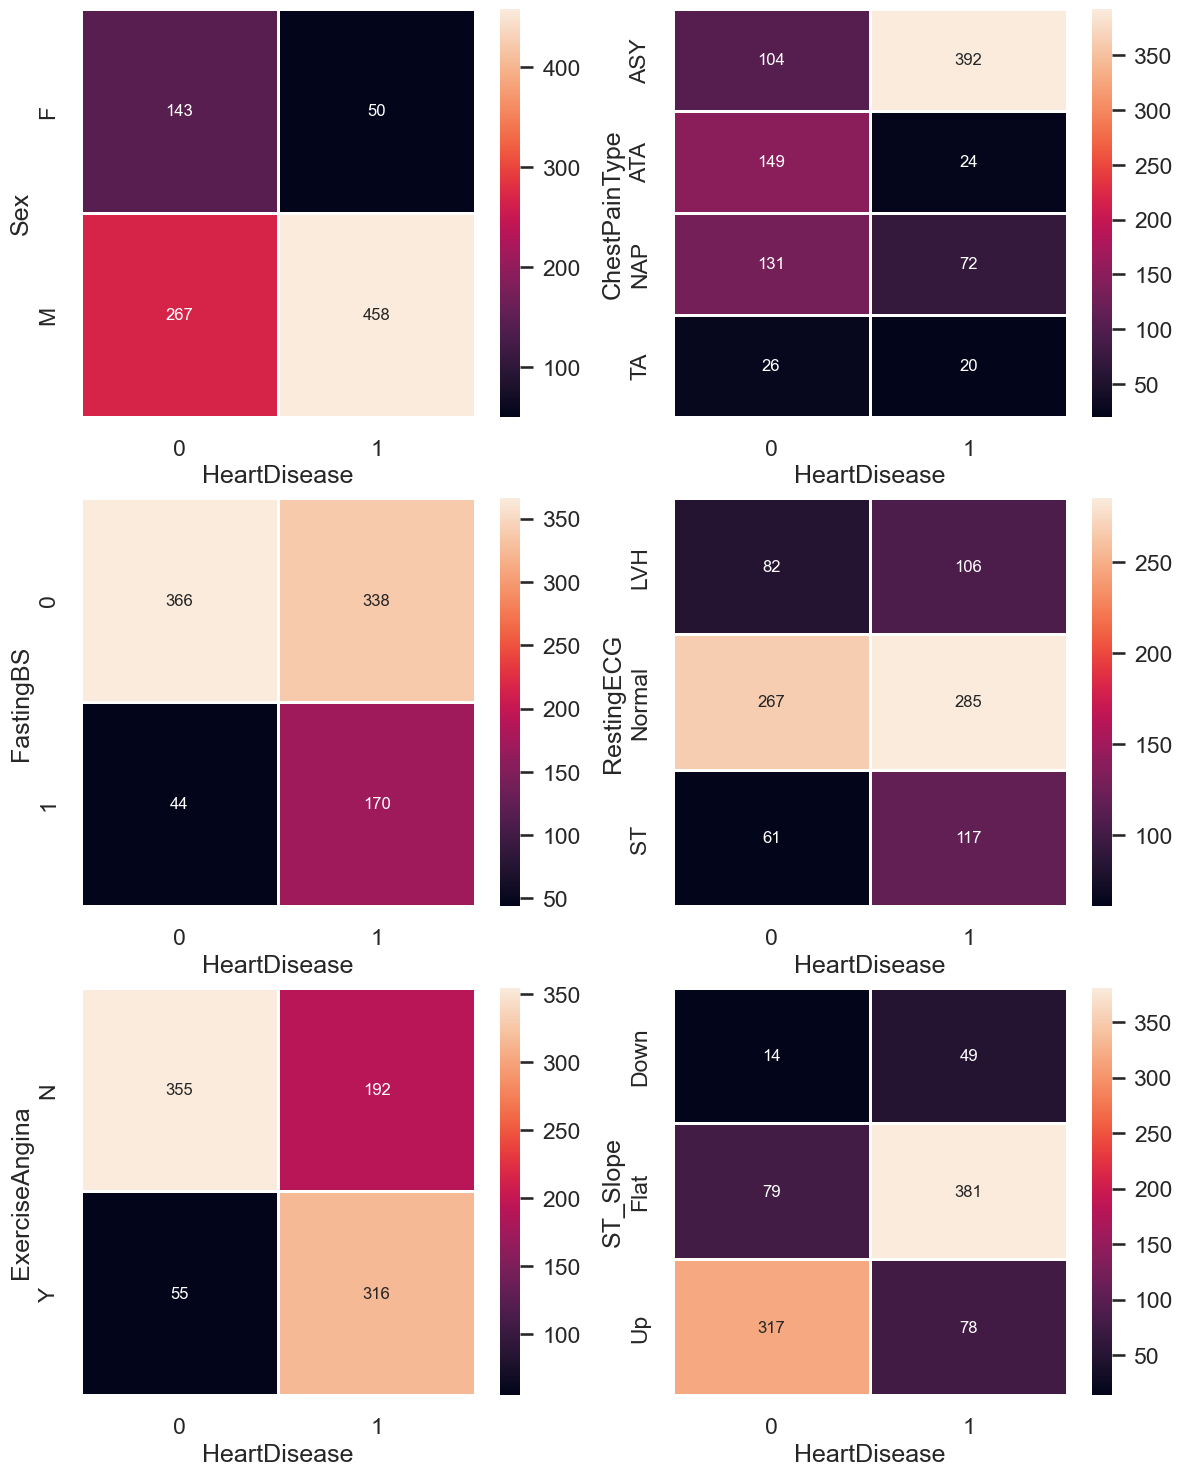

In [22]:
bivariateCategorical(categoricalHeartData)

<b>Sex</b>: We can see that the ratio of male to female is uneven. There are more male datapoints than female. However, men are more likely to be susceptable to heart disease than women. <br><br>

<b>ChestPainType</b>: The most common type of chest pain is Asymptomatic, followed by Non-Anginal Pain and Atypical Angina, and the least common one is Typical Angina.<br><br>

<b>FastinBS</b>: The dataset has more patients with a Fasting blood sugar higher than 120.<br><br>

<b>RestingECG</b>: Most of the datapoints have normal Resting ECG. This may be concerning as it might not be a good indicator of heart disease.<br><br>

<b>ExceriseAngina</b>: There is almost an equal distribution of people with exercise induced angina and those without.<br><Br>
    
<b>ST_Slope</b>: The most common one is flat, followed by up, and the least common one is down.

# <i>Multi-Variate Analysis

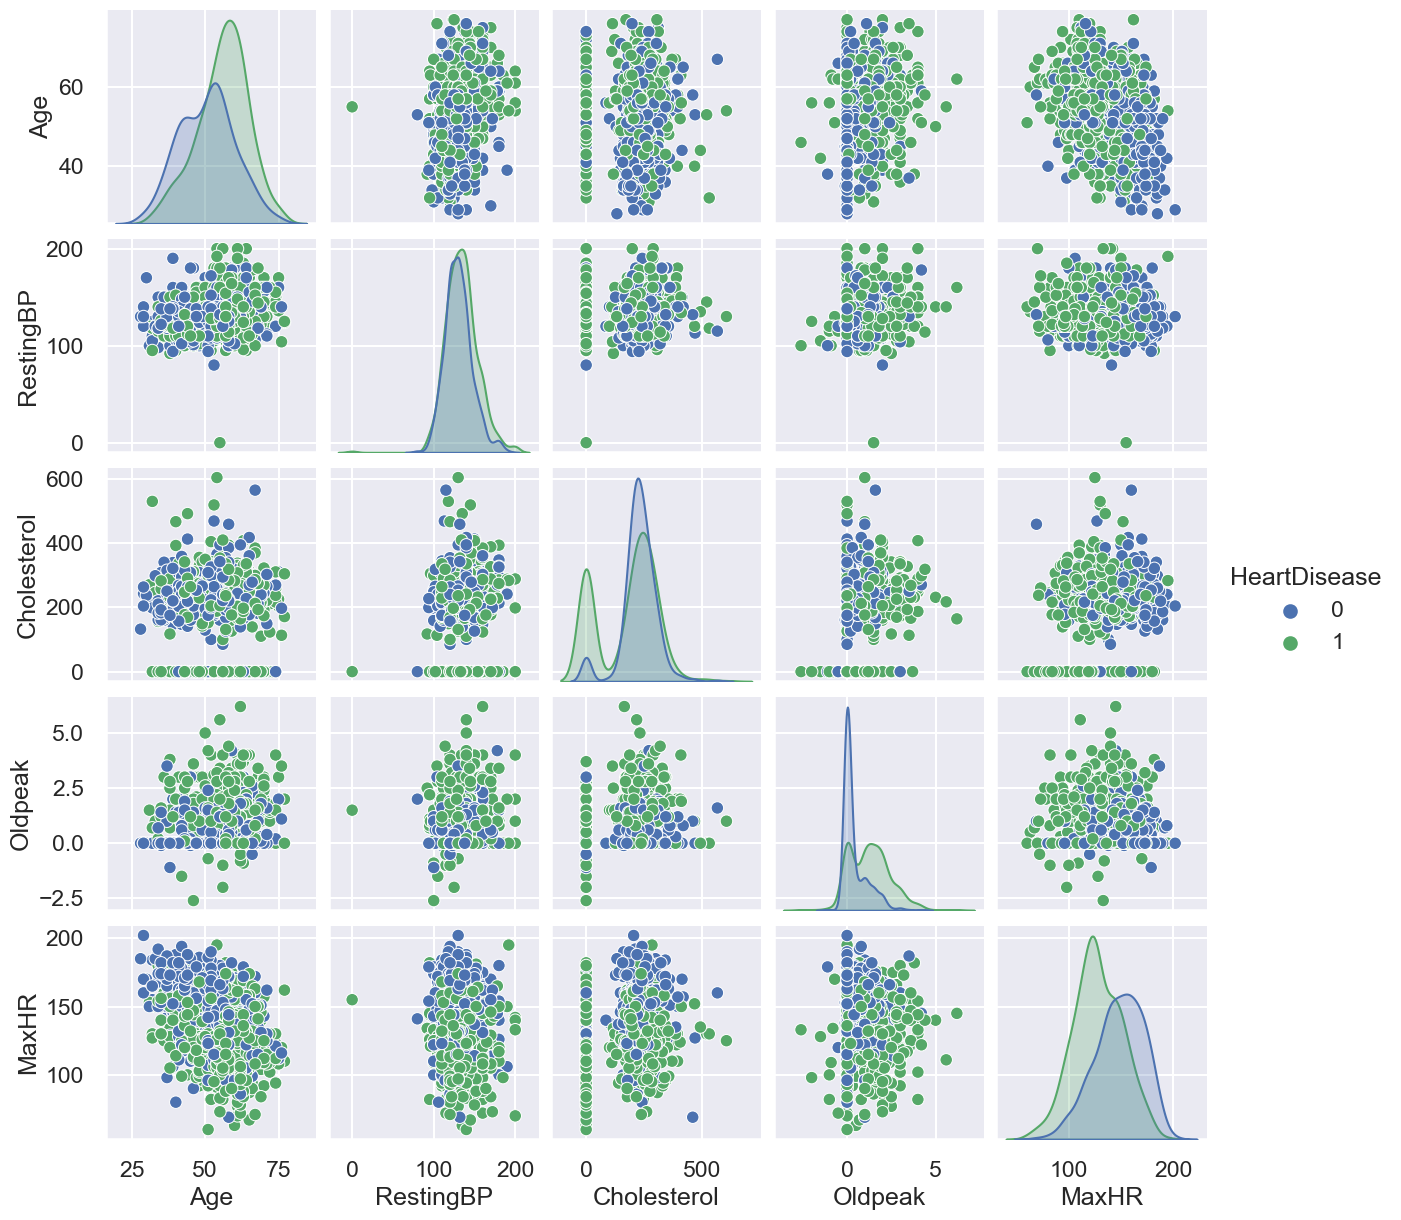

In [23]:
sns.pairplot(numericalHeartData,hue='HeartDisease')

In [24]:
numericalHeartData.corr()

,Age,RestingBP,Cholesterol,Oldpeak,MaxHR,HeartDisease
Age,1.000000,0.254399,-0.095282,0.258612,-0.382045,0.282039
RestingBP,0.254399,1.000000,0.100893,0.164803,-0.112135,0.107589
Cholesterol,-0.095282,0.100893,1.000000,0.050148,0.235792,-0.232741
Oldpeak,0.258612,0.164803,0.050148,1.000000,-0.160691,0.403951
MaxHR,-0.382045,-0.112135,0.235792,-0.160691,1.000000,-0.400421
HeartDisease,0.282039,0.107589,-0.232741,0.403951,-0.400421,1.000000


<Axes: >

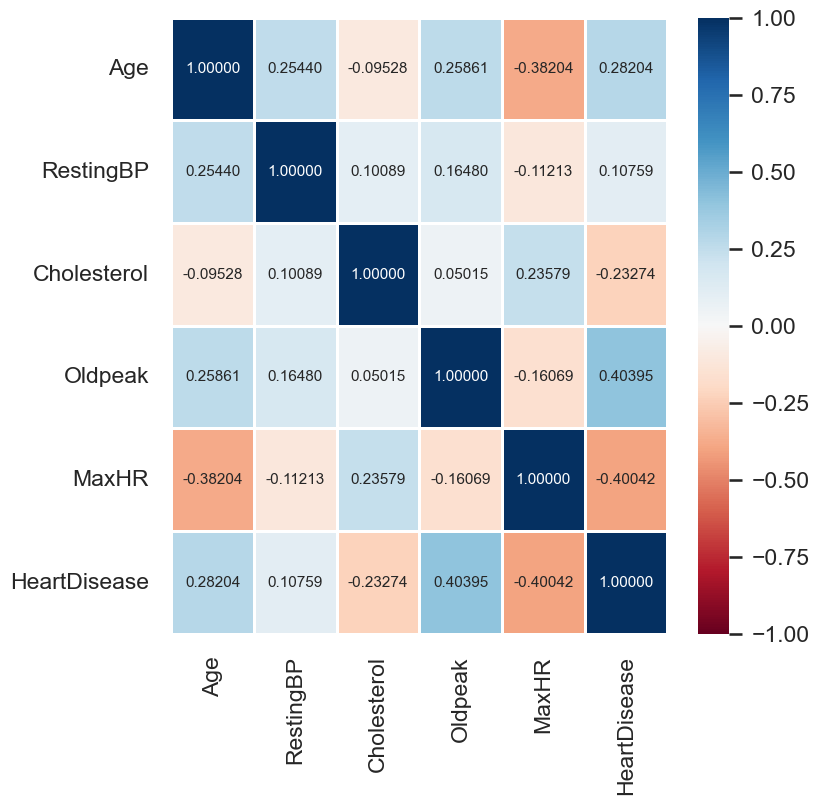

In [25]:
f = plt.figure(figsize=(8, 8))
sns.heatmap(numericalHeartData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".5f", annot_kws = {"size": 11}, cmap = "RdBu")

Interesting details noticed
* highest correlation is with HeartDisease and OldPeak
* second highest correlation is with HeartDisease and Age
* highest negative correlation is with Age and MaxHR
* second highest negative correlation is with Heart Disease and MxHR

In [26]:
heartDatabyGender= heartData.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
heartDatabyGender

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,52.492228,193,132.212435,241.196891,26,193,146.139896,193,0.668912,193,50
M,53.782069,725,132.445517,187.513103,188,725,134.325517,725,0.945517,725,458


Normalization : Oldpeak feature is to be normalized as it has positive and negative points, adn displayed a right skewed data distribution.<br><br>
Standardizarion : Age, RestingBP, Cholesterol and MaxHR features are scaled down because these features are normally distributed.

# <i>Cleaning

### Removing Outliers

From the averages and charts seen above, it is evident that the outliers disrupt the distribution and give incorrect data. For instance, the average cholesterol level of someone with heart disease is factually higher than someone who does not have heart disease. However, in this case, cholesterol levels are lower for persons with heart disease, which may cause inaccurate results. <br><br>Another instance where removing outliers would make sense would be RestingBP. In our case, there are 0 values, which is impossible. Hence removing these values can result in a more accurate model result.

In [27]:
outlierRemove(heartData, "Cholesterol")
outlierRemove(heartData, "RestingBP")

### Duplicates

We check for duplicates

In [28]:
heartData.duplicated().value_counts()

False    918
Name: count, dtype: int64

There seem to be no duplicates. Ideally, checking duplicates would be more efficient if there were IDs to every record. However, it is not the case here. Hence we just check if 2 or more records are the same. But there are no duplicates.

### Impute Missing Data

After removing the outliers, there seems to be missing values. In our case, we experimented with dropping the missing values and imputing it with the mean corresponding to the target variable. For example, from the removed variables, if the removed variable was from the row of person with heart disease, then the missing value will be the average of the person with heart disease corresponding to the column.

Dropping the values seemed to reduce the number of data points close to 200, that would mean an estimate of 20% loss of data, which could mean lesser data points for us to model. Hence we turned to imputing the average dependant on the heart disease case.

We did try using the module Impute from sklearn, however, the data seemed to get worse. So we created our own impute function where we get the mean of the data with heart disease, and replace the values with that mean corresponding to with heart disease, and used the same approach for values without heart disease.

In [29]:
missing(heartData)

,Number of records missing,Percentage of missing records
Cholesterol,172,0.187364
RestingBP,2,0.002179
Age,0,0.000000
Sex,0,0.000000
ChestPainType,0,0.000000
FastingBS,0,0.000000
RestingECG,0,0.000000
MaxHR,0,0.000000
ExerciseAngina,0,0.000000
Oldpeak,0,0.000000


From the function, we see the number of missing datapoints after removing the outliers. So we will use our personlised impute function to replace the null values with the corresponding mean.

In [30]:
replaceWithMean("Cholesterol")
replaceWithMean("RestingBP")

251.06179775280899
238.76923076923077
134.44970414201183
130.30317848410758


In [31]:
missing(heartData)

,Number of records missing,Percentage of missing records
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


As you can see there are no more missing values. Additionally, the average now seems to make more sense as shown below. The avergae cholesterol is in fact higher for people with heart disease than those without.

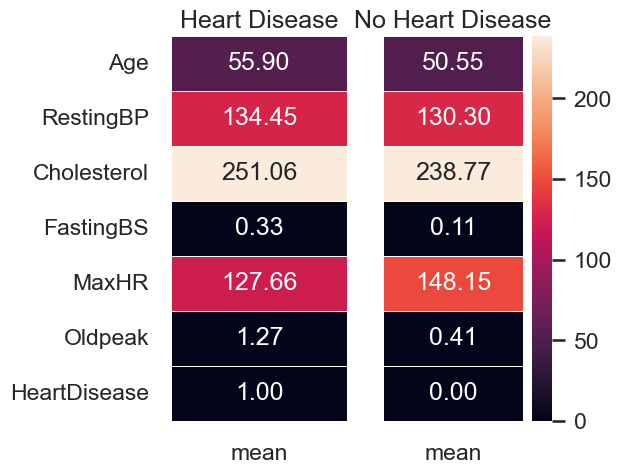

In [32]:
yes = heartData[heartData['HeartDisease'] == 1].describe().T
no = heartData[heartData['HeartDisease'] == 0].describe().T
colors = ['#f5428d','#a7effa']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = "rocket",linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = "rocket",linewidths = 0.4,linecolor = 'white',cbar = True,fmt = '.2f', yticklabels=False)
plt.title('No Heart Disease');

fig.tight_layout(pad = 20)

### Correlation

We will be identifying the correlation and relationship between the variables and heart disease. This way we can identify which variables have an impact on the target variable, and which don't.<br><Br>To begin, we will encode the categorical variables so that it is easier for the module to interpret and provide accurate results

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = heartData.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

Next, we normalize and standardize the data. 

why is this important? 

This is so that all the variables are assessed on the same scale and there are no biases and inaccurate information being fed. For normalization, as mentioned earlier, we will be taking `Oldpeak` and making it such that all variables lie in the positive axis. And for the required variables, we will be ensuring that all of the data points lie on the same curve for ease of comparison

In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Oldpeak'] = ss.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.413614,0.813998,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.531152,-1.229040,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.145155,0.701537,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.301860,-0.591762,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.972383,-0.947888,0,1,-0.581981,0,0.295455,2,0


Now we see the correlation between the 2. It is importnat to note that correlations lying close to 0 are the one's that are not really indicative of the target variable.

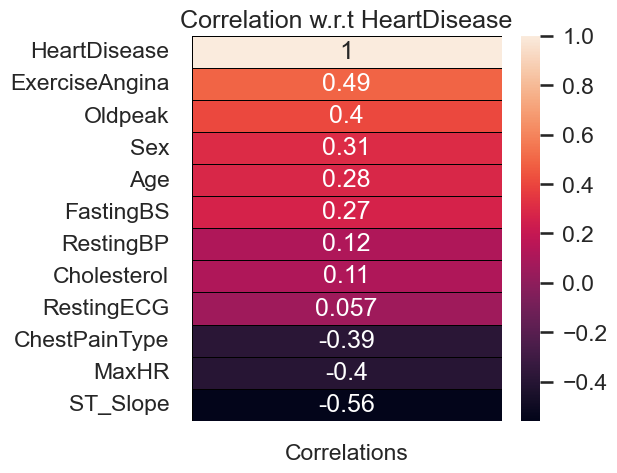

In [35]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = "rocket",linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

# <i> Feature Selection

While the above heat map should provide solid grounds for removing and considering variables, we will be using other tests such as the Chi Squared Test and the ANOVA test to clearly find out which variables we will be considering.

#### Chi Squared Test

The Chi Squared Test is used for categorical data and will provide the best and worst variables indicating the result of the target variable.

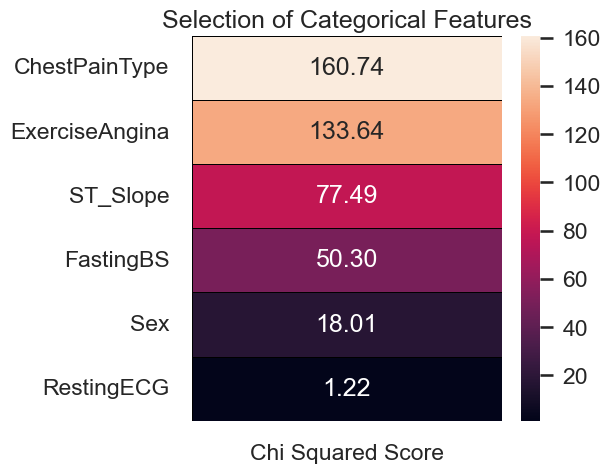

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

categorical_features = ["Sex", "ChestPainType", "FastingBS", "RestingECG" ,"ExerciseAngina" ,"ST_Slope" ,"HeartDisease"]

features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,
            cmap = "rocket",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

From here we can see that the strongest variable that indicates heart disease would be Chest Pain Type, Exercise induced Angina, and ST Slope. And the variables that do not contribute much to heart disease have been identified as Resting ECG rate. 


You can cross check this with the other graphs and explanations provided, it seems we are on the right track.

#### ANOVA Test

The ANOVA test is used for numerical data and will tell you what variables are good predictors of heart disease and what are not.

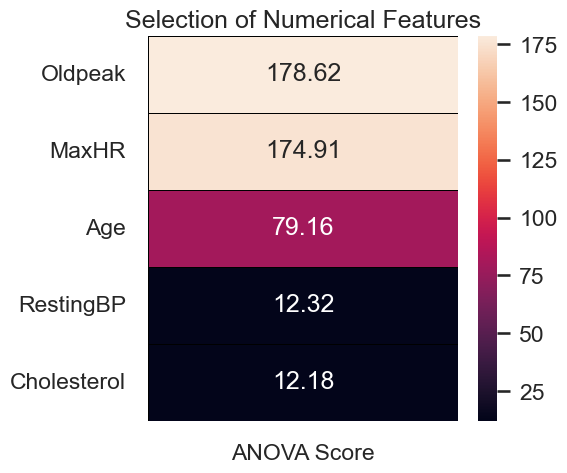

In [37]:
from sklearn.feature_selection import f_classif

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'Oldpeak', 'MaxHR']

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,
            cmap = "rocket",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

It is evident that OldPeak, MaxHR, and Age are good indicators of heart disease.

We can see that cholesterol levels and Resting Blood Pressure are not good indicators. However, I must argue that the cholesterol levels, although the difference is insignificant, is normal and is correct. As for resting blood pressure, we can remove it from the dataset since it is not a good indicator of heart disease.

In [38]:
heartData.drop('RestingECG', axis=1, inplace=True)
heartData.drop('RestingBP', axis=1, inplace=True)
heartData.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,289.0,0,172,N,0.0,Up,0
1,49,F,NAP,180.0,0,156,N,1.0,Flat,1
2,37,M,ATA,283.0,0,98,N,0.0,Up,0
3,48,F,ASY,214.0,0,108,Y,1.5,Flat,1
4,54,M,NAP,195.0,0,122,N,0.0,Up,0


# <i>Modelling

Here are the list of Data Preprocessing things that we would need to consider. 

* <b>Feature Scaling</b>: Different models are sensitive to different scaling. For instance, tree based models are more sensitive towards normalization, while non-tree models are more sensitive to standardization. What do I mean by sensitive? It just means that changes made before and after normalizing/standardizingg would make a significant difference, while non-sensitive would mean that there would make no difference. <br><br>

* <b>Handling Categorical Values</b>: Since our dataset has categorical values, and models cannot process words and would better understand numbers, and these numbers would need to be in 0's and 1's for standardizing it, we will be using one-hot encoding or label encoding depending on the model. Label encoding would mean that each category will be numbered instead. Label encoding would be more useful and is predominantly used in tree based algorithms, while distance based algorithms would use one hot encoding<br><br>

* <b>Cross Validation</b>: Cross validation partitions the data set into multiple 'folds' and runs the models with these 'folds' and the performance of the model is the average of the performance of the model for each fold. In our case, we will be using stratified k-fold cross validation, where the dataset is divided into k equal sized folds, and each fold has the same class distribution as the original dataset. The model is trained k times, with each fold used as the testing set, and the remaining k-1 folds using as the training set. <br><br>

* <b>Modelling</b><br><br>

* <b>Evaluating the Model</b>: We will be using precision, recall, and f1 score, accuracy, cross validation score and ROC AUC<br>

In [39]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,recall_score,roc_curve
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


##### Handling Categorical Variables - One Hot Encoding

In [40]:
categoricalHeartData = pd.DataFrame(heartData[['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope']])
# Concatenate dummy variables for categorical features
heartDataLog = pd.concat([heartData, pd.get_dummies(heartData[categoricalHeartData.columns])], axis=1)
heartDataLog.drop(categoricalHeartData.columns, axis=1, inplace=True) # remove the original categorical column

In [41]:
heartDataLog.head()

,Age,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,289.0,172,0.0,0,False,True,False,True,False,False,True,False,False,False,True
1,49,180.0,156,1.0,1,True,False,False,False,True,False,True,False,False,True,False
2,37,283.0,98,0.0,0,False,True,False,True,False,False,True,False,False,False,True
3,48,214.0,108,1.5,1,True,False,True,False,False,False,False,True,False,True,False
4,54,195.0,122,0.0,0,False,True,False,False,True,False,True,False,False,False,True


In [42]:
heartDataLog.replace({False: 0, True: 1}, inplace=True)
heartDataLog.head()

,Age,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,289.0,172,0.0,0,0,1,0,1,0,0,1,0,0,0,1
1,49,180.0,156,1.0,1,1,0,0,0,1,0,1,0,0,1,0
2,37,283.0,98,0.0,0,0,1,0,1,0,0,1,0,0,0,1
3,48,214.0,108,1.5,1,1,0,1,0,0,0,0,1,0,1,0
4,54,195.0,122,0.0,0,0,1,0,0,1,0,1,0,0,0,1


##### Seperating the Target and Predictor Variables

In [43]:
Y = heartDataLog["HeartDisease"]
X = heartDataLog.drop(columns=["HeartDisease"])


In [44]:
y = heartDataLog["HeartDisease"].values

#### MLP


--------------------------------
Fold 1:
Score: 0.78
Recall: 0.82
AUC: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        82
           1       0.79      0.82      0.80       102

    accuracy                           0.78       184
   macro avg       0.78      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184

-------------------------------


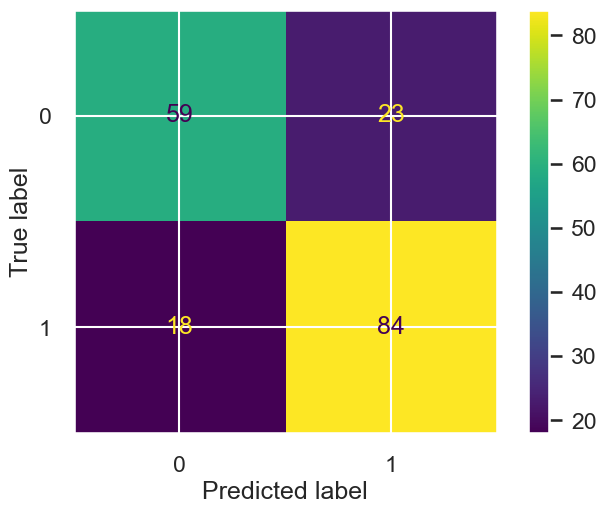


--------------------------------
Fold 2:
Score: 0.77
Recall: 0.78
AUC: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        82
           1       0.80      0.78      0.79       102

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184

-------------------------------


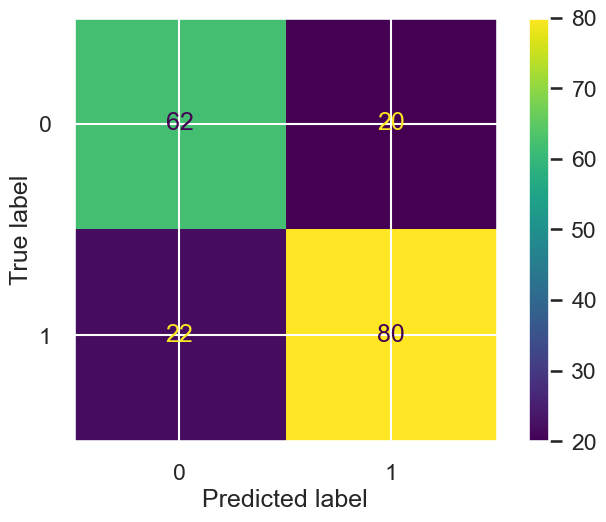


--------------------------------
Fold 3:
Score: 0.83
Recall: 0.85
AUC: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        82
           1       0.84      0.85      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

-------------------------------


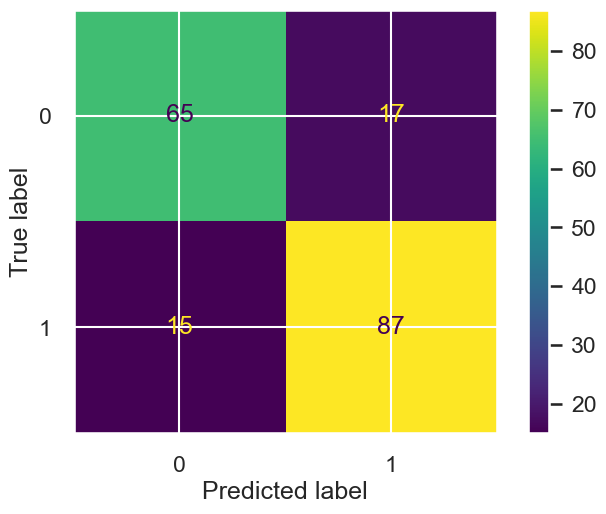


--------------------------------
Fold 4:
Score: 0.83
Recall: 0.83
AUC: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        82
           1       0.86      0.83      0.84       101

    accuracy                           0.83       183
   macro avg       0.83      0.83      0.83       183
weighted avg       0.83      0.83      0.83       183

-------------------------------


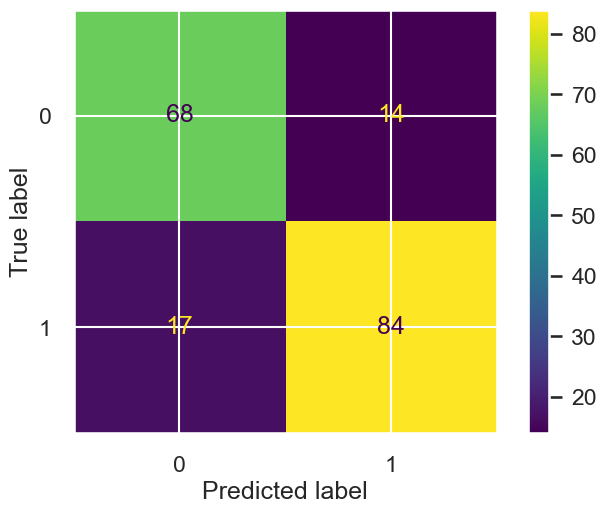


--------------------------------
Fold 5:
Score: 0.81
Recall: 0.8
AUC: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        82
           1       0.84      0.80      0.82       101

    accuracy                           0.81       183
   macro avg       0.81      0.81      0.81       183
weighted avg       0.81      0.81      0.81       183

-------------------------------


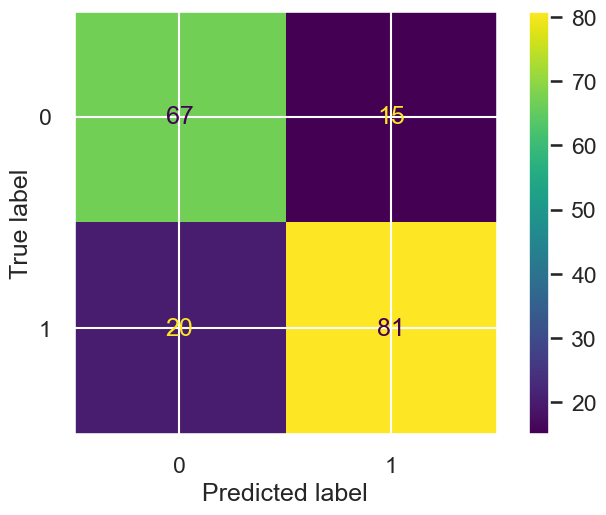

In [90]:
kf=model_selection.StratifiedKFold(n_splits=5, random_state=6, shuffle=True) # train test split

scaler = StandardScaler()

for fold, (train_idx, test_idx) in enumerate(kf.split(X=heartDataLog, y=y)):
    xtrain_fold, xtest_fold = X.iloc[train_idx], X.iloc[test_idx]
    ytrain_fold, ytest_fold = y[train_idx], y[test_idx]

    # Fit StandardScaler on the training data and transform both train and test data
    xtrain_fold_scaled = scaler.fit_transform(xtrain_fold)
    xtest_fold_scaled = scaler.transform(xtest_fold)

    # Initialize and train the MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 10), solver="lbfgs", random_state=6)
    mlp.fit(xtrain_fold_scaled, ytrain_fold)

    # Predict labels and probabilities on the test set
    y_pred = mlp.predict(xtest_fold_scaled)
    mlp_prob = mlp.predict_proba(xtest_fold_scaled)[:, 1]

    # Calculate evaluation metrics
    recall_mlp = round(recall_score(ytest_fold, y_pred), 2)
    mlp_auc = round(roc_auc_score(ytest_fold, mlp_prob), 2)
    mlp_score = round(mlp.score(xtest_fold_scaled, ytest_fold), 2)

    # Print evaluation metrics
    print('\n--------------------------------')
    print(f"Fold {fold + 1}:")
    print("Score:", mlp_score)
    print("Recall:", recall_mlp)
    print("AUC:", mlp_auc)
    print("Classification Report:")
    print(classification_report(ytest_fold, y_pred))
    print('-------------------------------')

    # Plot confusion matrix
    cm = confusion_matrix(ytest_fold, y_pred, labels=mlp.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
    disp.plot()
    plt.show()
    
   
    

#### Logistic Regression

In [46]:
target="HeartDisease"
y=heartDataLog[target].values

In [47]:
feature_col_nontree=heartDataLog.columns.to_list()
feature_col_nontree.remove(target)


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        82
           1       0.85      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184

The accuracy for Fold 1 : 0.8436154949784792


The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        82
           1       0.87      0.83      0.85       102

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

The accuracy for Fold 2 : 0.8373983739837398


The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.84      0.90      0.87       102

    accuracy                   

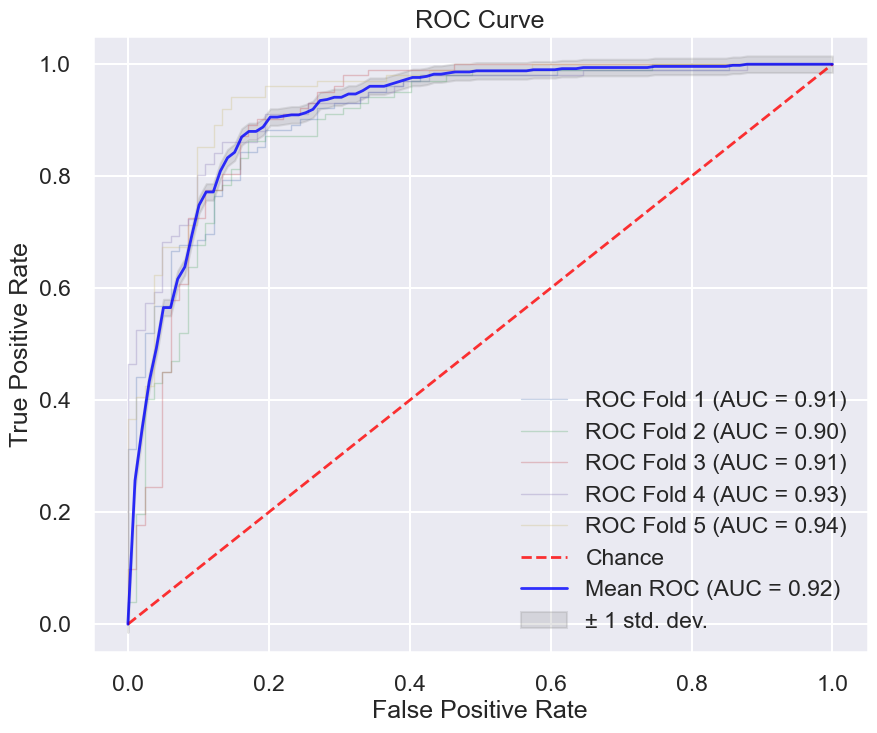

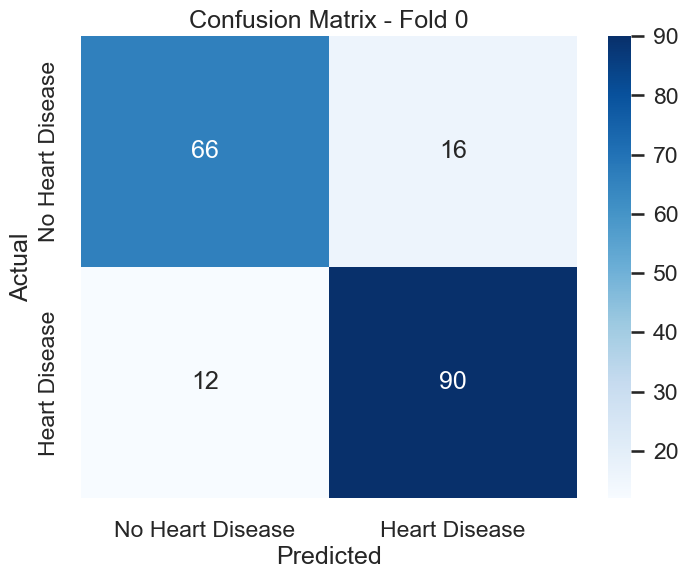

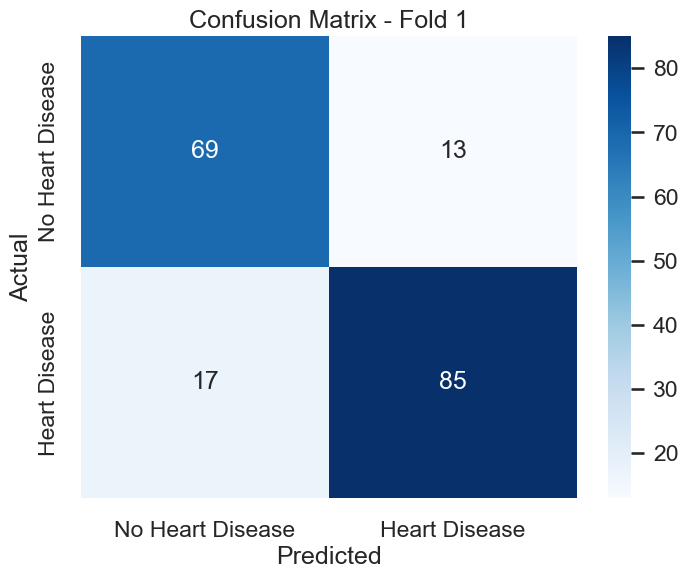

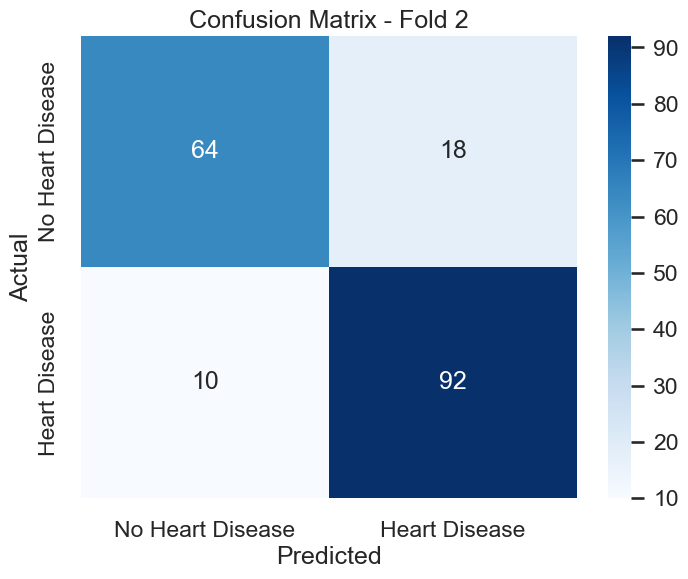

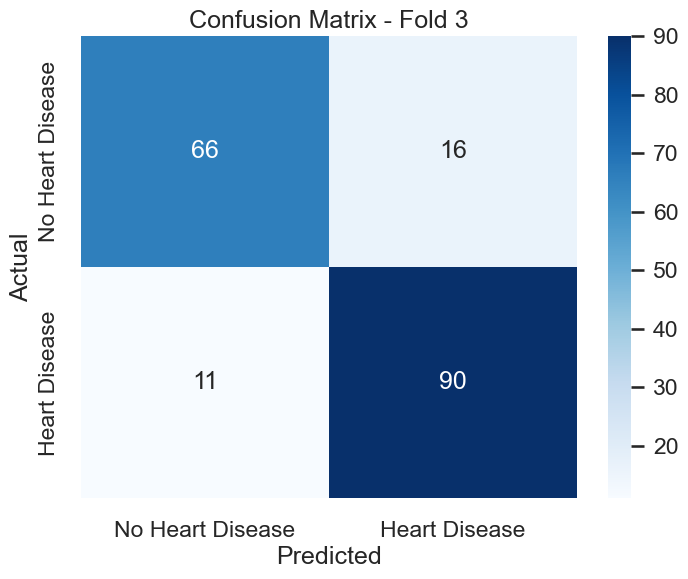

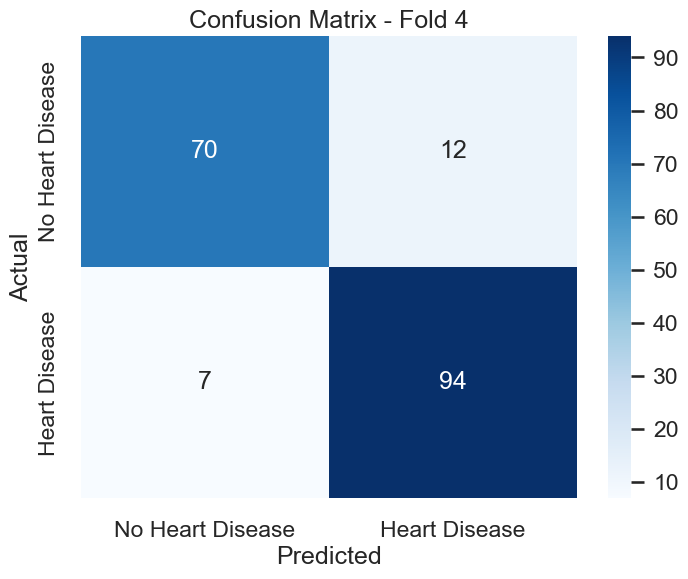

In [87]:
acc_log=[]

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize lists to store true positive rate (TPR) and false positive rate (FPR) for each fold
tprs = []
aucs = []
cm_plot = []

mean_fpr = np.linspace(0, 1, 100)

# Initialize figure
plt.figure(figsize=(10, 8))

kf=model_selection.StratifiedKFold(n_splits=5, random_state=6, shuffle=True)
for fold , (trn_,val_) in enumerate(kf.split(X=heartDataLog,y=y)):
    
    X_train=heartDataLog.loc[trn_,feature_col_nontree]
    y_train=heartDataLog.loc[trn_,target]
    
    X_valid=heartDataLog.loc[val_,feature_col_nontree]
    y_valid=heartDataLog.loc[val_,target]
    
    #print(pd.DataFrame(X_valid).head())
    ro_scaler=StandardScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    
    
    y_pred=clf.predict(X_valid)
    
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}\n\n")
    
    # ROC curve and AUC
    y_pred_prob = clf.predict_proba(X_valid)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_valid, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {fold+1} (AUC = {roc_auc:.2f})')
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    
    # Calculate predictions
    y_pred = clf.predict(X_valid)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_valid, y_pred)
    cm_plot.append(cm)
    
     
# Plotting mean ROC

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=.8)

# Plotting standard deviation
std_auc = np.std(aucs)
plt.fill_between(mean_fpr, mean_tpr - std_auc, mean_tpr + std_auc, color='grey', alpha=.2, label='± 1 std. dev.')

# Configure plot
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

j=0
for i in cm_plot:
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(i, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Heart Disease', 'Heart Disease'], 
                yticklabels=['No Heart Disease', 'Heart Disease'])
    
    plt.title(f'Confusion Matrix - Fold {j}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print()
    j+=1
    
    